In [198]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
from sklearn.metrics import confusion_matrix

col_names = ['hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator', 'toothed', 'backbone','breathes','venomous','fins','legs','tail','domestic','catsize','type']

pima = pd.read_csv("zoo_data.csv", header=None, names=col_names)

pima.head()



,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [199]:
feature_cols = ['hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator', 'toothed', 'backbone','breathes','venomous','fins','legs','tail','domestic','catsize']

In [200]:
X=pima.values[:,:16]
#X = pima[feature_cols]

In [201]:
X

array([[1, 0, 0, ..., 0, 0, 1],
       [1, 0, 0, ..., 1, 0, 1],
       [0, 0, 1, ..., 1, 0, 0],
       ...,
       [1, 0, 0, ..., 1, 0, 1],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 1, 1, ..., 1, 0, 0]])

In [202]:
Y=pima.values[:,-1]
#y = pima.type
Y

array([1, 1, 4, 1, 1, 1, 1, 4, 4, 1, 1, 2, 4, 7, 7, 7, 2, 1, 4, 1, 2, 2,
       1, 2, 6, 5, 5, 1, 1, 1, 6, 1, 1, 2, 4, 1, 1, 2, 4, 6, 6, 2, 6, 2,
       1, 1, 7, 1, 1, 1, 1, 6, 5, 7, 1, 1, 2, 2, 2, 2, 4, 4, 3, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 7, 4, 1, 1, 3, 7, 2, 2, 3, 7, 4, 2, 1, 7, 4, 2,
       6, 5, 3, 3, 4, 1, 1, 2, 1, 6, 1, 7, 2])

In [203]:
target_names=['1','2','3','4','5','6','7']

In [204]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

In [205]:

# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [206]:

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Confusion matrix :",confusion_matrix(y_test, y_pred))


Accuracy: 0.9354838709677419
Confusion matrix : [[13  0  0  0  0  0  0]
 [ 0  5  0  0  0  0  0]
 [ 0  0  2  0  0  0  1]
 [ 0  0  0  2  0  0  0]
 [ 0  0  0  0  2  0  0]
 [ 0  0  0  0  0  3  0]
 [ 0  0  0  0  0  1  2]]


In [207]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         5
           3       1.00      0.67      0.80         3
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         2
           6       0.75      1.00      0.86         3
           7       0.67      0.67      0.67         3

    accuracy                           0.94        31
   macro avg       0.92      0.90      0.90        31
weighted avg       0.94      0.94      0.93        31



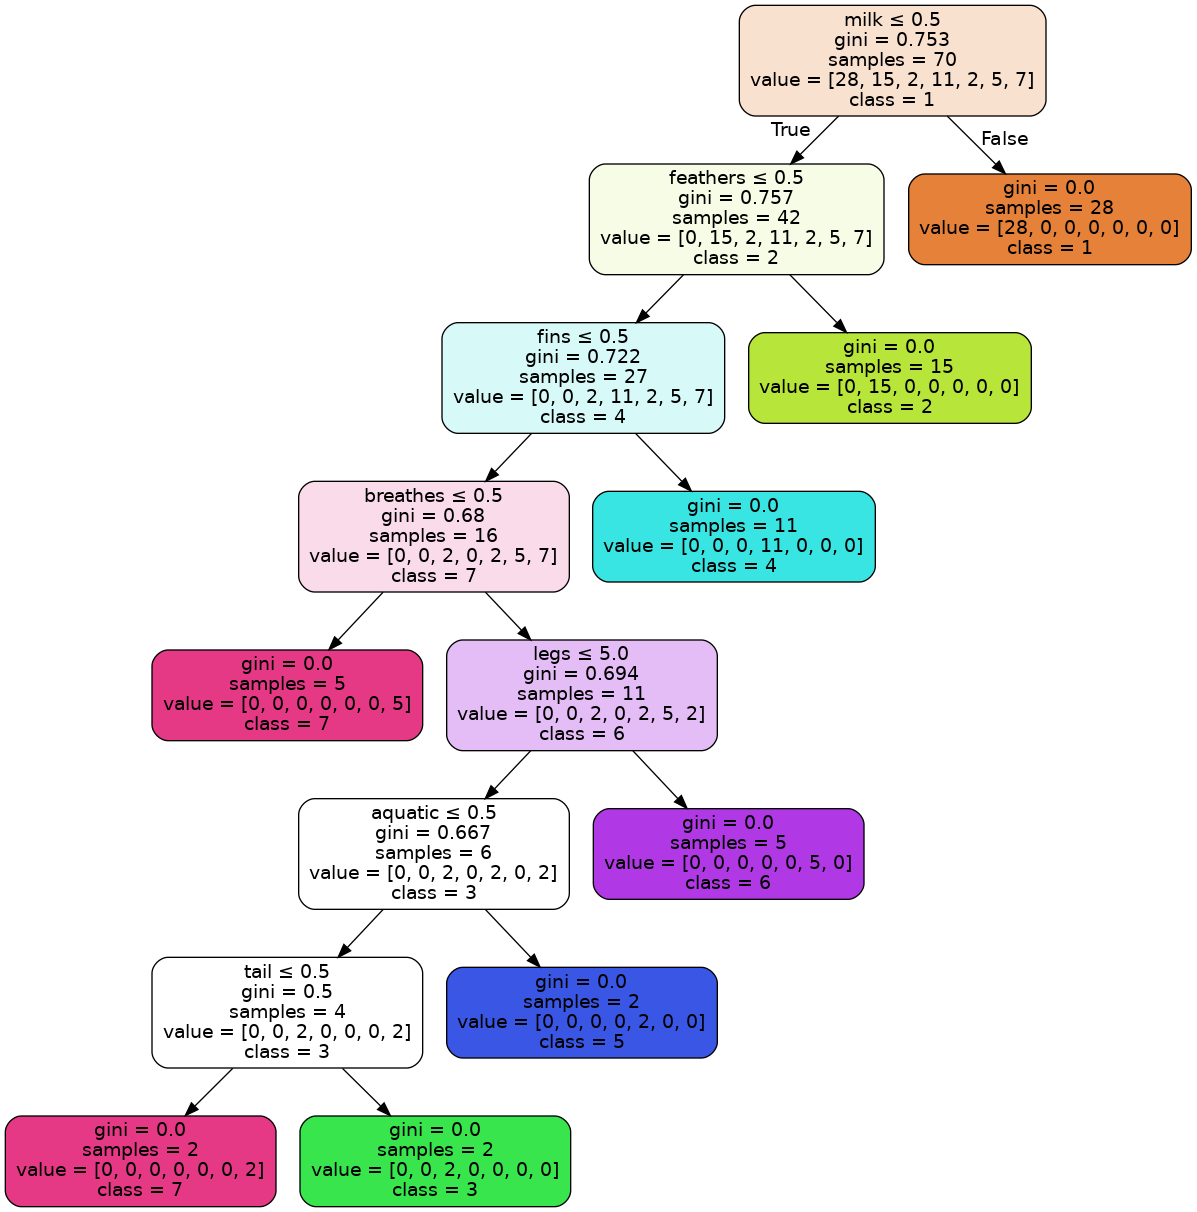

In [208]:
from sklearn.tree import export_graphviz
from io import StringIO
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['1','2','3','4','5','6','7'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('zoo.png')
Image(graph.create_png())

In [209]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Confusion matrix :",confusion_matrix(y_test, y_pred))

Accuracy: 0.7419354838709677
Confusion matrix : [[13  0  0  0  0  0  0]
 [ 0  5  0  0  0  0  0]
 [ 0  0  0  3  0  0  0]
 [ 0  0  0  2  0  0  0]
 [ 0  0  0  2  0  0  0]
 [ 0  0  0  0  0  0  3]
 [ 0  0  0  0  0  0  3]]


In [210]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         5
           3       0.00      0.00      0.00         3
           4       0.29      1.00      0.44         2
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         3
           7       0.50      1.00      0.67         3

    accuracy                           0.74        31
   macro avg       0.40      0.57      0.44        31
weighted avg       0.65      0.74      0.67        31



/home/root1/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/root1/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/root1/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


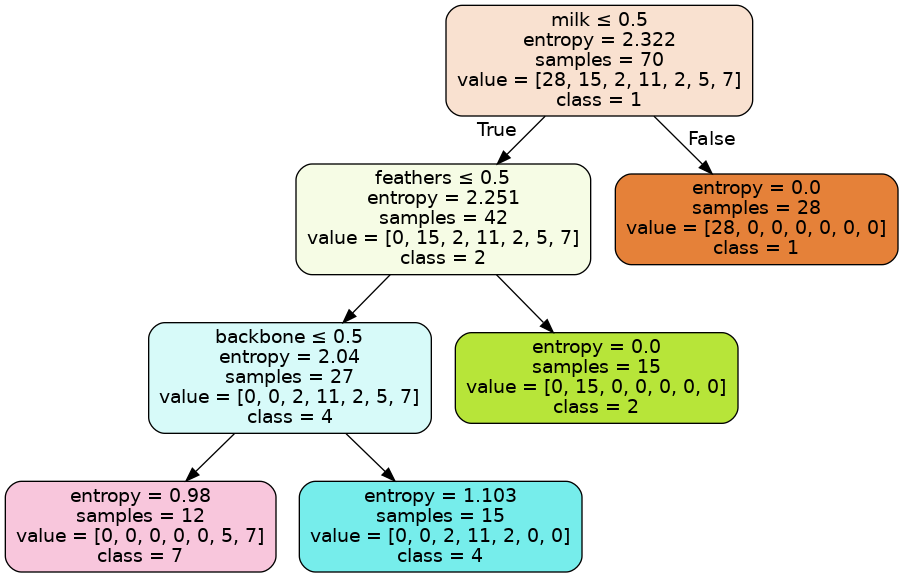

In [211]:
from io import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['1','2','3','4','5','6','7'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('zoo.png')
Image(graph.create_png())